# Exercises for Session 6: Web Scraping 1

In session 5 you briefly touched upon extracting data from the internet. You worked with APIs which can be used to download data from a webpage in a structured way. Sometimes the webpage do not provide an API or the data you can download via the API is limited. In that case we will need to extract the data from the webpage ourselves. 

In the next three sessions you will learn how to extract data from a webpage when you cannot use an API. It involves mapping through the webpage (find the right URLs) and extracting the desired data from the webpage's HTML string (HTML: the underlying language behind a webpage).

*(Note: I recommend to use Chrome as your browser during the next three sessions. Lectures and exercises are solely based on Chrome.)*

# Part 1: Scraping Jobnet.dk

When we want to scrape a webpage, the first thing we do is to investigate the webpage. First, we need to get an overview of the URLs of all the webpages we want to scrape. Second, we download the HTML-string from the webpages. You can learn more about this in video 6.1:

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

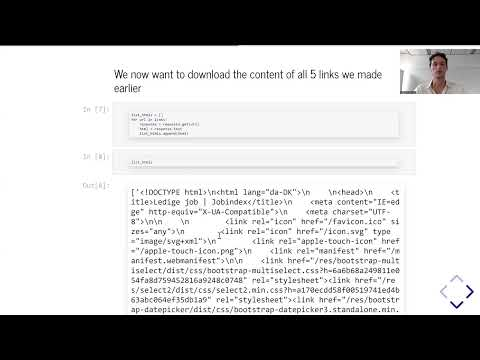

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xiu-acDIm28', width=640, height=360)

> **Ex. 6.1.1:** Go to  www.jobnet.dk and investigate the page. Locate the webpage that shows the job postings. Use the `request` module to extract the HTML-string of the webpage. 
>
> Remember to add name and email to the header of your request, so the website managers can see that you are not a malicious actor.

> *Note:* The HTML-string will not make a lot of sense right now, but try to take a look at it. In the next session we will learn how to extract data from the HTML-string.

> *Note:* The website is in Danish, but it should be no problem for non-Danish speaking persons to solve the exercises.

In [17]:
# YOUR CODE HERE

# Solution to Ex. 6.1.1
import requests

links = []
for page in range(1,6,1):
    url = f'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f'
    links.append(url)

# Define headers with your name and email
headers = {
    'User-Agent': 'Mette Juul <mettejuul1998@gmail.com>'
}
links


['https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f',
 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f',
 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f',
 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f',
 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f']

When you have completed exercise 6.1.1 you have scraped your first webpage! I.e., you have retrieved the HTML-string of the webpage you wanted to extract data from. In session 7 we will learn how to get the relevant data from the HTML-string. But first we want to learn about how to go through all the webpages we want to scrape and retrieve the HTML-strings behind: `mapping`

> **Ex. 6.1.2:** Start your `mapping`: We want to figure out what URLs we need to scrape to collect job posting data. 

> You will see that there are 20 job postings per page, and that you can click through the pages with job postings on the bottom of the page. Figure out what the structure of the URL is, so you can click through the job posting pages by changing the URL. 

> Describe the structure of the URL in plain words below. What is the relevant paging parameter (the parameter you need to change to go to the next webpage) and how does it behave when you change page?

### Answer
Your answer here

Solution to Ex 6.1.2

Example of URL Structure Analysis
Based on a common pattern used in pagination, here's a general approach:

Initial URL: You start with the base URL for the first page of job postings.
bash
Kopier kode
https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f
Pagination Parameter: Observe how the URL changes when navigating to different pages. Often, there will be a query parameter like page, start, or offset.
For example:

Page 1: https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=1
Page 2: https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=2
Page 3: https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=3
Here, page is the parameter that changes to navigate through pages. When you increase the value of page, you move to the next set of job postings.
Summary of URL Structure:
Base URL: https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f
Paging Parameter: page
Behavior: The page parameter changes to reflect the current page number. Increasing this parameter will show the next page of job postings.

> **Ex. 6.1.3:** Make a list of the URLs of the first 5 webpages with job postings.

> *Hint 1:* Design a `for loop` using the `range` function that changes the paging parameter in the URL.
>
> *Hint 2:* How do you change the paging parameter in the URL-string? Here string formatting is your friend! Read about it [here](https://realpython.com/python-string-formatting) (I recommend that you adopt the f-strings formatting which is a relatively new and nice feature in Python). 

In [19]:
# YOUR CODE HERE

# Solution to Ex. 6.1.3

# Base URL for job postings
base_url = 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page='

# Generate URLs for the first 5 pages
urls = [f'{base_url}{i}' for i in range(1, 6)]

# Print the list of URLs
for url in urls:
    print(url)

https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=1
https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=2
https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=3
https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=4
https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page=5


> **Ex. 6.1.4:** Now loop through the list and scrape the HTML-strings of all 5 webpages using the `request` module again and save the HTML-strings in a list. 

> - Use the `time.sleep()` function to limit the rate of your calls. This is important to avoid overloading the webpage's server. Worst case, you can be banned from the website.

> - ***Extra:*** Monitor the time left to completing the loop by using `tqdm.tqdm()` function.

In [20]:
# YOUR CODE HERE

# Solution to Ex. 6.1.4

import requests
import time
import tqdm  # Install tqdm using pip if you haven't already

# Define the base URL and create the list of URLs as before
base_url = 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page='
urls = [f'{base_url}{i}' for i in range(1, 6)]

# List to store HTML content
html_contents = []

# Define headers with your name and email
headers = {
    'User-Agent': 'Mette Juul <mettejuul1998@gmail.com>'
}

# Loop through each URL to scrape HTML content
for url in tqdm.tqdm(urls, desc="Scraping pages", unit="page"):
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            html_contents.append(response.text)
        else:
            print(f"Failed to retrieve {url}. Status code: {response.status_code}")
    except requests.RequestException as e:
        print(f"Request failed for {url}: {e}")
    
    # Sleep to avoid overloading the server
    time.sleep(2)  # Adjust the sleep time as needed

# At this point, html_contents contains the HTML strings of all pages
print(f"Scraped {len(html_contents)} pages successfully.")


Scraping pages: 100%|██████████| 5/5 [00:17<00:00,  3.49s/page]

Scraped 5 pages successfully.


#### In the video below (video 6.2) you will learn about logging and handling exceptions. Watch it before continuing with Ex.6.1.5

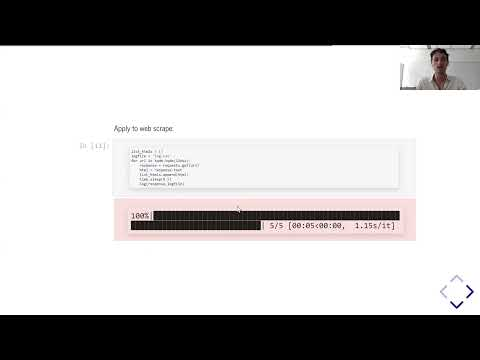

In [2]:
YouTubeVideo('d9fx8m7dQmI', width=640, height=360)

> **Ex. 6.1.5:** Repeat 6.1.4, but now log your activity as well. 

In [21]:
# YOUR CODE HERE

# Solution to Ex. 6.1.5

import requests
import time
import tqdm  # Install tqdm using pip if you haven't already
import logging

# Set up logging
logging.basicConfig(filename='scraping_log.txt',  # Log file
                    level=logging.INFO,  # Set the log level to INFO
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Define the base URL and create the list of URLs as before
base_url = 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page='
urls = [f'{base_url}{i}' for i in range(1, 6)]

# List to store HTML content
html_contents = []

# Define headers with your name and email
headers = {
    'User-Agent': 'Mette Juul <mettejuul1998@gmail.com>'
}

# Log the start of the scraping process
logging.info('Starting the scraping process.')

# Loop through each URL to scrape HTML content
for url in tqdm.tqdm(urls, desc="Scraping pages", unit="page"):
    try:
        logging.info(f'Scraping URL: {url}')
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            html_contents.append(response.text)
            logging.info(f'Successfully scraped URL: {url}')
        else:
            logging.error(f"Failed to retrieve {url}. Status code: {response.status_code}")
    except requests.RequestException as e:
        logging.error(f"Request failed for {url}: {e}")
    
    # Sleep to avoid overloading the server
    time.sleep(2)  # Adjust the sleep time as needed

# Log the completion of the scraping process
logging.info(f"Scraped {len(html_contents)} pages successfully.")


Scraping pages: 100%|██████████| 5/5 [00:19<00:00,  3.97s/page]


> **Ex. 6.1.6:** It is a good idea to build a scraper that can handle exceptions (for example a link that for some reason does not exist or connection problems). Build such an exception into your scraper from 6.1.5, so you do not loose the scraped data if it crashes halfway through.

In [23]:
# YOUR CODE HERE

# Solution to Ex. 6.1.6

import requests
import time
import tqdm
import logging
import os

# Konfigurér logging
logging.basicConfig(filename='scraping_log.txt', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Base URL og URL-liste
base_url = 'https://www.borger.dk/arbejde-dagpenge-ferie/Arbejdsloeshed/find-et-job?NavigationTaxonomyId=00f2b35b-88e5-4ed5-a98c-fb062df75f0f&page='
urls = [f'{base_url}{i}' for i in range(1, 6)]

# Liste til HTML-indhold
html_contents = []

# Sørg for output-mappe
os.makedirs('output', exist_ok=True)

# Start logging
logging.info('Starting scraping.')

# Loop gennem URL'er
for url in tqdm.tqdm(urls, desc="Scraping", unit="page"):
    try:
        response = requests.get(url, headers={'User-Agent': 'Mette Juul <mettejuul1998@gmail.com>'})
        response.raise_for_status()
        html_contents.append(response.text)
        logging.info(f'Success: {url}')
    except requests.RequestException as e:
        logging.error(f'Error {url}: {e}')
    time.sleep(0.5)

# Gem HTML-indhold
for i, content in enumerate(html_contents, start=1):
    with open(f'output/page_{i}.html', 'w', encoding='utf-8') as file:
        file.write(content)

logging.info('Scraping completed.')


Scraping: 100%|██████████| 5/5 [00:06<00:00,  1.39s/page]


# Part 2: Locating data through the network panel

Sometimes you may be fortunate to find the request that the webpage sends to the server to retrieve the data for the webpage. In that case, we can just replicate the request to receive the data in a structured format (JSON). Then we do not need to struggle with the HTML-strings.

To do this, we first need to find the request. For that purpose, the **network panel** in the Chrome Developer Tools is useful. The network panel monitors all the uploads and downloads to and from the webpage. You can read more about the network panel [here](https://developer.chrome.com/docs/devtools/network/).

**Watch the video below (video 6.3) before working on the exercises.**

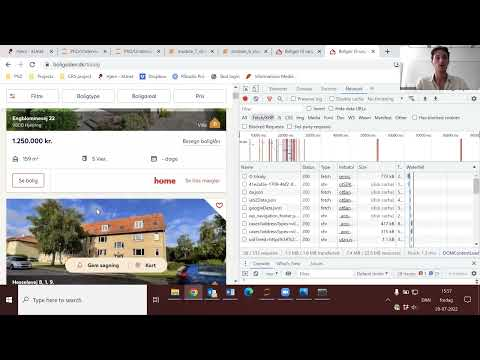

In [3]:
YouTubeVideo('isUxBDzfWMg', width=640, height=360)

> **Ex. 6.2.1:** Go to the job posting page at www.jobnet.dk again. Open the network panel and choose *Fetch/XHR* type ([Read more: XMLHttpRequest](https://en.wikipedia.org/wiki/XMLHttpRequest)). If you update the page, you will see all the XHR resources the page generates. 

> Go through all the XHRs and find the XHR that carries the information about the different job postings. What is the name of the XHR?
>
>*Note: There is no smart way to do this. You just need to go through all the XHRs and inspect the information they carry.*

### Answer
Your answer here

# Solution to Ex 6.2.1

https://job.jobnet.dk/CV/FindWork/Search

Trin-for-Trin Vejledning

Åbn Jobopslags-Siden:
Gå til www.jobnet.dk.

Åbn Udviklerværktøjer:
I de fleste browsere kan du åbne udviklerværktøjer ved at trykke på F12 eller højreklikke på siden og vælge "Inspicer" eller "Inspicer element".

Gå til Netværksfanen:
Klik på fanen "Netværk" i udviklerværktøjerne.

Filtrer Efter XHR:
I netværksfanen, vælg filteret "XHR". Dette vil vise kun XMLHttpRequests.

Opdater Siden:
Genindlæs siden ved at trykke på F5 eller Ctrl + R. Dette vil opdatere netværksfanen med alle XHR-anmodningerne, som siden sender, mens den indlæses.

Undersøg Hver XHR:
Klik på hver XHR-anmodning for at se dens detaljer. Tjek "Navn" på anmodningen og "Svar"-fanen for at identificere hvilken, der indeholder oplysninger om jobopslag.

Identificér Den Relevante XHR:
Find en XHR-anmodning, der returnerer data relateret til jobopslag. Dataene vil ofte være i JSON-format og vil inkludere oplysninger som jobtitler, beskrivelser, og andre relevante detaljer.

> **Ex. 6.2.2:** Use the request URL to download the JSON file consisting of the first 20 job postings. Return the request result in JSON format.

In [24]:
# YOUR CODE HERE

import requests

# URL fra den XHR-anmodning du identificerede (erstat denne med den faktiske URL)
url = 'https://job.jobnet.dk/CV/FindWork/Search'

# Send GET-anmodning til URL'en
response = requests.get(url)

# Tjek om anmodningen var succesfuld
if response.status_code == 200:
    # Konverter svaret til JSON-format
    data = response.json()
    # Udskriv eller returner JSON-data
    print(data)
else:
    print(f"Fejl ved hentning af data: {response.status_code}")


{'Expression': {'ShowNearbyCriteria': True, 'Offset': 0, 'Count': 20, 'SearchString': None, 'SortValue': 'CreationDate', 'Ids': [], 'IdsToExclude': [], 'EarliestPublicationDate': '0001-01-01T00:00:00', 'HotJob': False, 'Abroad': False, 'NearBy': None, 'ExternalJob': None, 'WorkPlaceNotStatic': None, 'WorkHourMin': None, 'WorkHourMax': None, 'OnlyGeoPoints': False, 'Facets': {'Region': [], 'Country': [], 'Municipality': [], 'PostalCode': [], 'HiringOrgName': [], 'OccupationAreas': [], 'OccupationGroups': [], 'Occupations': [], 'EmploymentType': [], 'WorkHours': [], 'WorkHourPartTime': [], 'JobAnnouncementType': [], 'WorkPlaceNotStatic': []}, 'LocatedIn': None, 'LocationZip': None, 'Location': None, 'SearchInGeoDistance': 0, 'IsWorkInDenmarkJob': False, 'SimilarOccupations': None, 'SearchWithSimilarOccupations': False}, 'Facets': {'Region': [{'Id': 0, 'Value': 'Hovedstaden og Bornholm', 'Count': 6270}, {'Id': 0, 'Value': 'Midtjylland', 'Count': 3898}, {'Id': 0, 'Value': 'Syddanmark', 'Co

> **Ex. 6.2.3:** The JSON file consists of three different key-value pairs. We are only interested in the pair that contains the job postings. Find the right key-value pair and convert the JSON data to a Pandas dataframe.

In [26]:
# YOUR CODE HERE

# Solution to Ex. 6.2.3

import requests
import pandas as pd

# URL fra den XHR-anmodning du identificerede (erstat denne med den faktiske URL)
url = 'https://job.jobnet.dk/CV/FindWork/Search'

# Send GET-anmodning til URL'en
response = requests.get(url)

# Tjek om anmodningen var succesfuld
if response.status_code == 200:
    # Konverter svaret til JSON-format
    data = response.json()
    
    # Find den rigtige nøgle (erstat 'jobPostings' med den faktiske nøgle)
    job_postings = data.get('jobPostings', [])
    
    # Konverter jobopslag til Pandas DataFrame
    df = pd.DataFrame(job_postings)
    
    # Udskriv DataFrame
    print(df.head())  # Udskriv de første par rækker af DataFrame
else:
    print(f"Fejl ved hentning af data: {response.status_code}")


Empty DataFrame
Columns: []
Index: []


> **Ex. 6.2.4:** At this point, we have information about the first 20 job postings. Now we want the job postings of the first 5 pages, i.e. the first 100 job postings. 

> Use the same procedure as in **Ex. 6.1.3-4** to download the first 100 postings and save them in a dataframe.
>
> *Note: Remember to limit the rate of your calls, log your activity, and think about how to handle exceptions.*

> *Hint: Recall the paging parameter from **Ex. 6.1.2**. You can use the same paging parameter in the new request URL to loop through the 5 pages.*

In [34]:
# YOUR CODE HERE

# Solution to Ex. 6.2.4
import requests
import json

# Function to fetch job postings for a given page number
def fetch_job_postings(page):
    url = f"https://job.jobnet.dk/CV/FindWork/Search?Offset={page}0"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP request errors
        return response.json().get('JobPositionPostings', [])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

# Aggregate job postings from the first 5 pages
all_job_postings = []
for page in range(5):
    job_postings = fetch_job_postings(page)
    all_job_postings.extend(job_postings)

# Print the number of job postings fetched
print(f"Total job postings fetched: {len(all_job_postings)}")

# Optionally, save the results to a file
with open("job_postings_first_5_pages.json", "w", encoding="utf-8") as file:
    json.dump(all_job_postings, file, ensure_ascii=False, indent=4)

# Display the first few job postings
print(all_job_postings[:2])


Total job postings fetched: 100
[{'AutomatchType': 0, 'Abroad': False, 'Weight': 1.0, 'Title': 'Projektfysioterapeut til fast stilling', 'JobHeadline': 'Projektfysioterapeut til fast stilling', 'Presentation': 'Vores aktiviteter stiger og vi søger derfor to nye kollegaer som projektfysioterapeuter i Klinik for Nerve- og Muskelsygdomme med tiltrædelse 01.10.2024.  Om Klinik for Nerve- og Muske', 'HiringOrgName': 'Rigshospitalet', 'WorkPlaceAddress': 'Blegdamsvej 9', 'WorkPlacePostalCode': '2100', 'WorkPlaceCity': 'København Ø', 'WorkPlaceOtherAddress': False, 'WorkPlaceAbroad': False, 'WorkPlaceNotStatic': False, 'UseWorkPlaceAddressForJoblog': True, 'PostingCreated': '2024-08-07T00:00:00', 'LastDateApplication': '2024-08-25T00:00:00', 'FormattedLastDateApplication': '25. august 2024', 'AssignmentStartDate': '0001-01-01T00:00:00', 'IsHotjob': False, 'IsExternal': False, 'Url': 'https://job.jobnet.dk/CV/FindWork/Details/6094044', 'Region': 'Hovedstaden og Bornholm', 'Municipality': 'Købe

> **Ex. 6.2.5 (optional):** What are the top 5 occupation areas with most job postings out of the 100 postings? How many job postings do the top 5 occupation areas have each?

In [29]:
# YOUR CODE HERE

# Sulution to Ex. 6.2.5
